In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('df.csv', header = 0, sep = ',')

In [4]:
df.head()

,src_ip,dst_ip,src_port,dst_port,first_pkt_time,last_pkt_time,avg_hops,avg_packet_len,nodeRelatedMessages:HeartbeatRequest,nodeRelatedMessages:HeartbeatResponse,...,nodeRelatedMessages:SessionSetDeletionResponse,sessionRelatedMessages:SessionEstablishmentRequest,sessionRelatedMessages:SessionEstablishmentResponse,sessionRelatedMessages:SessionModificationRequest,sessionRelatedMessages:SessionModificationResponse,sessionRelatedMessages:SessionDeletionRequest,sessionRelatedMessages:SessionDeletionResponse,sessionRelatedMessages:SessionReportRequest,sessionRelatedMessages:SessionReportResponse,class
0,6003::1002,6003::1001,14605,14595,1.603074e+09,1.603075e+09,190,129,0,0,...,0,34,117,454,24,43,32,221,134,0
1,8.190.148.106,6003::101e,27254,5270,1.603083e+09,1.603083e+09,190,197,11,2,...,0,277,63,407,422,178,79,267,15,1
2,182.40.138.233,6003::fd8,18208,18198,1.603091e+09,1.603091e+09,190,239,33,13,...,0,224,11,416,130,16,72,77,142,1
3,65.203.204.93,2000::100:51f,43202,48112,1.603090e+09,1.603091e+09,190,132,0,13,...,0,224,3,1217,598,143,30,345,23,1
4,6003::1001,2000::100:507,14600,14605,1.603074e+09,1.603075e+09,190,83,2,7,...,0,94,109,218,254,9,28,111,214,0


In [5]:
df_len = len(df)

In [6]:
train_len = round(df_len / 100 * 70) #X
#test_len = df_len - train_len #Y

In [7]:
df.iloc[0:5, -1]

0    0
1    1
2    1
3    1
4    0
Name: class, dtype: int64

In [8]:
#df['class'].replace('normal', 0, inplace=True)
#df['class'].replace('abnormal', 1, inplace=True)

In [9]:
# учебник
# тренировочная выборка

X_train = df.iloc[0:train_len, 6:-1] # входные данные, "задачи"
Y_train = df.iloc[0:train_len, -1] # что мы пытаемся предсказать, "ответы" на "задачи"

In [10]:
X_train

,avg_hops,avg_packet_len,nodeRelatedMessages:HeartbeatRequest,nodeRelatedMessages:HeartbeatResponse,nodeRelatedMessages:PFDManagementRequest,nodeRelatedMessages:PFDManagementResponse,nodeRelatedMessages:AssociationSetupRequest,nodeRelatedMessages:AssociationSetupResponse,nodeRelatedMessages:AssociationUpdateRequest,nodeRelatedMessages:AssociationUpdateResponset,...,nodeRelatedMessages:SessionSetDeletionRequest,nodeRelatedMessages:SessionSetDeletionResponse,sessionRelatedMessages:SessionEstablishmentRequest,sessionRelatedMessages:SessionEstablishmentResponse,sessionRelatedMessages:SessionModificationRequest,sessionRelatedMessages:SessionModificationResponse,sessionRelatedMessages:SessionDeletionRequest,sessionRelatedMessages:SessionDeletionResponse,sessionRelatedMessages:SessionReportRequest,sessionRelatedMessages:SessionReportResponse
0,190,129,0,0,0,0,0,0,0,0,...,0,0,34,117,454,24,43,32,221,134
1,190,197,11,2,0,0,0,0,0,0,...,0,0,277,63,407,422,178,79,267,15
2,190,239,33,13,0,0,0,0,0,0,...,0,0,224,11,416,130,16,72,77,142
3,190,132,0,13,0,0,0,0,0,0,...,0,0,224,3,1217,598,143,30,345,23
4,190,83,2,7,0,0,0,0,0,0,...,0,0,94,109,218,254,9,28,111,214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,190,288,26,15,0,0,0,0,0,0,...,0,0,277,90,1217,430,178,52,345,120
176,190,145,12,9,0,0,0,0,0,0,...,0,0,17,53,518,363,15,45,159,26
177,190,255,0,2,0,0,0,0,0,0,...,0,0,105,51,210,659,22,72,25,4
178,190,123,7,8,0,0,0,0,0,0,...,0,0,0,8,573,506,14,75,33,163


In [11]:
Y_train

0      0
1      1
2      1
3      1
4      0
      ..
175    1
176    0
177    0
178    0
179    0
Name: class, Length: 180, dtype: int64

In [12]:
# экзамен
# тестовая выборка

X_test = df.iloc[train_len:, 6:-1]
Y_test = df.iloc[train_len:, -1]

In [13]:
X_test

,avg_hops,avg_packet_len,nodeRelatedMessages:HeartbeatRequest,nodeRelatedMessages:HeartbeatResponse,nodeRelatedMessages:PFDManagementRequest,nodeRelatedMessages:PFDManagementResponse,nodeRelatedMessages:AssociationSetupRequest,nodeRelatedMessages:AssociationSetupResponse,nodeRelatedMessages:AssociationUpdateRequest,nodeRelatedMessages:AssociationUpdateResponset,...,nodeRelatedMessages:SessionSetDeletionRequest,nodeRelatedMessages:SessionSetDeletionResponse,sessionRelatedMessages:SessionEstablishmentRequest,sessionRelatedMessages:SessionEstablishmentResponse,sessionRelatedMessages:SessionModificationRequest,sessionRelatedMessages:SessionModificationResponse,sessionRelatedMessages:SessionDeletionRequest,sessionRelatedMessages:SessionDeletionResponse,sessionRelatedMessages:SessionReportRequest,sessionRelatedMessages:SessionReportResponse
180,190,84,9,8,0,0,0,0,0,0,...,0,0,77,40,505,155,37,81,27,20
181,190,200,3,12,0,0,0,0,0,0,...,0,0,224,111,1510,78,178,73,49,26
182,190,227,4,4,0,0,0,0,0,0,...,0,0,277,54,1217,207,57,82,345,192
183,191,261,5,15,0,0,0,0,0,0,...,0,0,25,105,171,206,69,16,30,12
184,190,128,15,0,0,0,0,0,0,0,...,0,0,86,11,93,408,1,74,21,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,191,101,26,0,0,0,0,0,0,0,...,0,0,277,51,1217,646,81,37,345,150
253,190,202,33,0,0,0,0,0,0,0,...,0,0,224,22,1510,407,143,76,345,9
254,191,172,33,3,0,0,0,0,0,0,...,0,0,36,120,542,92,15,18,3,237
255,191,155,26,15,0,0,0,0,0,0,...,0,0,277,73,1217,385,143,56,267,159


In [14]:
Y_test

180    0
181    1
182    1
183    0
184    1
      ..
252    1
253    1
254    1
255    1
256    1
Name: class, Length: 77, dtype: int64

In [15]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [16]:
KNNReg = KNeighborsClassifier()

In [17]:
KNNReg.fit(X_train, Y_train)

KNeighborsClassifier()

In [18]:
KNNReg.predict(X_test)

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [23]:
from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import neg_root_mean_squared_error
import matplotlib.pyplot as plt

In [20]:
KNN = KNeighborsRegressor()

In [110]:
#old ver
GS = GridSearchCV(KNN, {
                 'n_neighbors': [1, 2, 3, 5, 7, 9],
                 'weights': ['uniform', 'distance'],
                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'] 
                        })

In [111]:
GS.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': [1, 2, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [112]:
GS.predict(X_test)

array([0.5, 0. , 0. , 0. , 0. , 0. , 0. ])

In [27]:
#new ver
GS = GridSearchCV(KNN, {
                 'n_neighbors': [1, 2, 3, 5, 7, 9],
                 'weights': ['uniform', 'distance'],
                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'] 
                        }
                 , cv = 3,
                 scoring = 'neg_root_mean_squared_error')

In [28]:
GS.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': [1, 2, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='neg_root_mean_squared_error')

In [33]:
model = GS.best_estimator_

In [35]:
model

KNeighborsRegressor(algorithm='brute', metric='manhattan', n_neighbors=9,
                    weights='distance')

In [38]:
prediction = model.predict(X_test)

In [39]:
prediction

array([0.        , 1.        , 1.        , 0.        , 0.        ,
       0.10486281, 0.66219571, 0.08881323, 1.        , 0.        ,
       0.        , 1.        , 0.10102966, 1.        , 0.08830689,
       0.10162827, 0.10840774, 0.        , 0.2141314 , 0.        ,
       0.10894519, 0.10243386, 0.11506334, 1.        , 0.18493898,
       0.10138593, 0.        , 1.        , 0.12858865, 0.21807945,
       0.        , 0.23899698, 1.        , 0.1116783 , 0.        ,
       1.        , 0.49069492, 1.        , 0.        , 0.10781208,
       0.10186056, 0.21768147, 0.        , 0.        , 0.09285408,
       0.10094501, 1.        , 0.        , 1.        , 0.0907504 ,
       0.34092648, 0.08687223, 0.        , 0.09771547, 0.        ,
       0.11067774, 0.        , 1.        , 0.08581618, 0.09803056,
       0.0962774 , 0.54356795, 0.        , 0.        , 0.21221025,
       0.10268265, 0.23205454, 0.        , 0.82571694, 0.22496269,
       0.20940835, 0.09565913, 1.        , 1.        , 0.11701

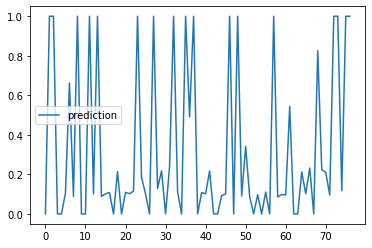

In [47]:
%matplotlib inline
plt.plot(prediction[:], label = 'prediction')
#plt.plot(Y_test.iloc[:], label = 'real')
plt.legend()

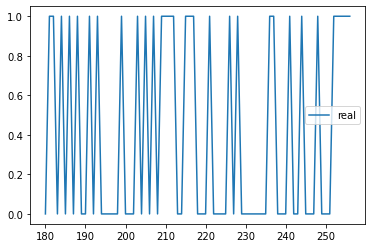

In [48]:
%matplotlib inline
#plt.plot(prediction[:], label = 'prediction')
plt.plot(Y_test.iloc[:], label = 'real')
plt.legend()